In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [9]:
X, y = load_iris(return_X_y=True, as_frame=True)

In [10]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2011, test_size=20)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
58,6.6,2.9,4.6,1.3
115,6.4,3.2,5.3,2.3
65,6.7,3.1,4.4,1.4
147,6.5,3.0,5.2,2.0
79,5.7,2.6,3.5,1.0
...,...,...,...,...
99,5.7,2.8,4.1,1.3
59,5.2,2.7,3.9,1.4
40,5.0,3.5,1.3,0.3
77,6.7,3.0,5.0,1.7


In [12]:
df_train = X_train.copy()
df_train['specie'] = y_train.copy()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 58 to 43
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  130 non-null    float64
 1   sepal width (cm)   130 non-null    float64
 2   petal length (cm)  130 non-null    float64
 3   petal width (cm)   130 non-null    float64
 4   specie             130 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.1 KB


In [17]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),130.0,5.860000,0.857489,4.3,5.1,5.8,6.475,7.9
sepal width (cm),130.0,3.045385,0.428647,2.0,2.8,3.0,3.300,4.2
petal length (cm),130.0,3.799231,1.778445,1.0,1.6,4.4,5.100,6.9
petal width (cm),130.0,1.216923,0.768583,0.1,0.3,1.3,1.800,2.5
specie,130.0,1.023077,0.820903,0.0,0.0,1.0,2.000,2.0


/workspaces/knn_algorithm/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


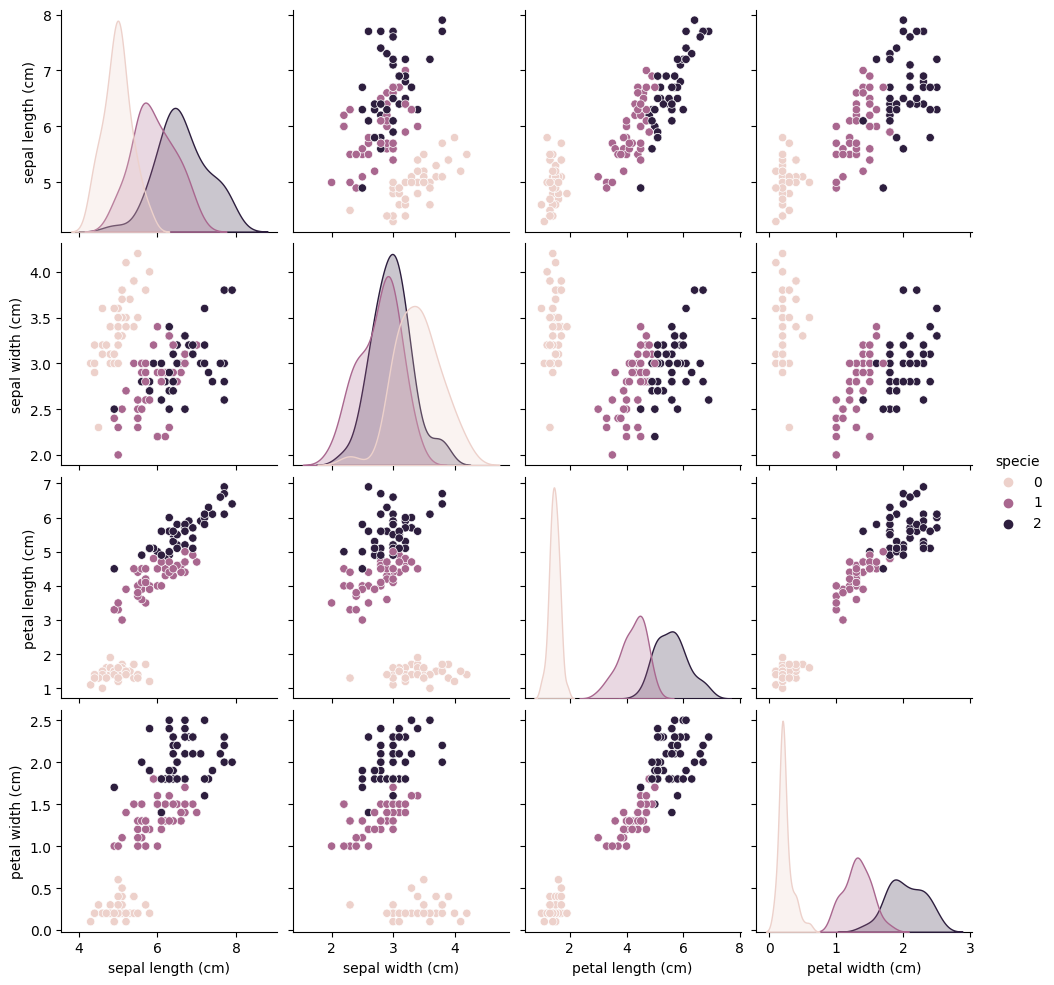

In [16]:
sns.pairplot(data=df_train, hue='specie')
plt.show()

In [14]:
df_train.drop(['specie'], axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.078329,0.877145,0.822042
sepal width (cm),-0.078329,1.000000,-0.381894,-0.328003
petal length (cm),0.877145,-0.381894,1.000000,0.962649
petal width (cm),0.822042,-0.328003,0.962649,1.000000


In [19]:
my_scaler = MinMaxScaler()
X_train_sc = my_scaler.fit_transform(X_train)
X_test_sc = my_scaler.transform(X_test)

In [20]:
model = KNeighborsClassifier()
model.fit(X_train_sc,y_train)
y_hat = model.predict(X_test_sc)
print(f"Accuracy: {accuracy_score(y_test,y_hat):.2f}")

Accuracy: 0.90
